Medvirkende: Hedda Bjørnstad, Julie Marie Ervik og Kristin Fullu

# Simulering av virrevandrere og kartlegging av tumorer

Diffusjon er definert som en bevegelse av stoff fra områder med høy konsentrasjon til områder med lav konsentrasjon (1). Fenomenet ble oppdaget av botanikeren Robert Brown i 1827. Oppdagelsen ble gjort da han studerte pollenkorn i vann og oppdaget partikler som beveget seg tilfeldig rundt i løsningen. Denne tilfeldige bevegelsen av partiklene skyldtes kollisjoner mellom partiklene og molekylene i væsken, også kalt Brownske bevegelser eller virrevandring. Virrevandringen kan man finne igjen mange ulike steder, som blant annet i aksjemarkedet og ved spredning av gasser. Diffusjon kan også brukes i medisin for å lokalisere kreftceller, og det er dette oppgaven går ut på. 

Vannmolekyler, som blir våre virrevandrere, beveger seg forskjellig i friskt vev og tumorer fordi celletettheten i tumorer er høyere enn i friskt vev. Dermed kan man med MRI maskiner finne tumorer ved å se etter høyere tetthet av vannmolekyler i forskjellige deler av kroppen. Dette kommer vi til å se illustrasjoner av senere i prosjektet. MRI maskiner blir ofte brukt til diagnostikk da bildene tas ved hjelp av magnetisme og hele 70% av kroppen består av polare vannmolekyler.

I dette prosjektet skal fenomenet virrevandring ses på numerisk i både 1D og 2D, for så å implementeres i et system hvor bevegelsesmønsteret til virrevandrerne benyttes for å undersøke forekomsten av tumorer. Dette er en forenklet tilnærming av hvordan hvordan MRI avbildning foregår ettersom vi ikke tar i bruk vannmolekylenes polare egenskaper, men bare antar at vi kan observere dem. Vi ser til slutt på intensiteten til virrevandrerne, som viser hvilke områder der det er lav diffusjon, altså høy tetthet av celler og dermed tumorer.

## Oppgave 1:
## Frie virrevandrere i én og to dimensjoner

### Oppgave 1 a)

Sannsnligheten for at en virrevandrers posisjon ved en tid t er i posisjon x er gitt ved variabelen $\varphi$, som er uttrykt som en normalfordeling med null forventningsverdi og varians $\sigma = at$. Sannsynlighetstettheten til en normalfordeling er gitt ved

\begin{equation}
f(x)=\frac{1}{\sqrt{2\pi}}\frac{1}{\sigma}e^{-\frac{1}{2}\frac{(x-\mu)^{2}}{\sigma^{2}}}. 
\label{eq:normalfordeling} \tag{1}
\end{equation}

Med oppgitte verdier for forventningsverdi og varians satt inn, gir dette


\begin{equation}
\varphi=\frac{1}{\sqrt{2\pi}}\frac{1}{\sqrt{at}}e^{-\frac{1}{2}\frac{x^{2}}{at}}.
\label{eq:normfordinnsatt} \tag{2}
\end{equation}

Den oppgitte ligningen som skal løses er diffusjonsligningen med konstant D,

\begin{equation}
\frac{\partial\varphi(x,t)}{\partial t} = D\frac{\partial^{2}\varphi}{\partial x^{2}},
\label{eq:diffusjon} \tag{3}
\end{equation}

hvor

\begin{equation}
D = \frac{(\Delta x)^{2}}{2\Delta t}. 
\label{eq:d} \tag{4}
\end{equation}

I oppgave 1 er det oppgitt at både $\Delta x$ og $\Delta t$ skal settes lik 1. Dette gir dermed at 

\begin{equation}
D=\frac{1}{2}. 
\label{eq:dinnsatt} \tag{5}
\end{equation}

For å se om $\varphi(x,t)$ løser diffusjonsligningen, partiellderiveres $\varphi(x,t)$ mhp. x og t. Dette gir uttrykkene

\begin{equation}
\begin{split}
\frac{\partial\varphi(x,t)}{\partial t} &= \frac{1}{\sqrt{2\pi}} \Bigg\{\left( \frac{\partial}{\partial t} \frac{1}{\sqrt{at}} \right) e^{-\frac{1}{2} \frac{x^{2}}{at}} + \frac{1}{\sqrt{at}} \left( \frac{\partial}{\partial t} e^{-\frac{1}{2} \frac{x^{2}}{at}} \right) \Bigg\} 
\\
\\
&= \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2} \frac{x^{2}}{at}} \Bigg\{ 2\frac{t}{\sqrt{a}} - \frac{1}{2}\frac{x^{2}}{\sqrt{at}}\frac{1}{a t^{2}} \Bigg\}
\\
\\
&= \frac{ae^{\frac{-x^{2}}{2at}}(x^{2}-at)}{2\sqrt{2\pi}(at)^{\frac{5}{2}}} 
\end{split}
\label{eq:partiellphit} \tag{6}
\end{equation}

og

\begin{equation}
\begin{split}
\frac{\partial^{2}\varphi}{\partial x^{2}} &= \frac{\partial\varphi}{\partial x} \Bigg\{-\frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{at}} \frac{x}{at} e^{-\frac{1}{2} \frac{x^{2}}{at}} \Bigg\} 
\\
\\
&= \frac{1}{\sqrt{2\pi}} \frac{1}{\sqrt{at}} \Bigg\{ \frac{x^{2}}{at} - \frac{1}{\sqrt{at}} \Bigg\}
\\
\\
&= \frac{e^{\frac{-x^{2}}{2at}}(x^{2}-at)}{\sqrt{2\pi}(at)^{\frac{5}{2}}}. 
\end{split}
\label{eq:partiellphix} \tag{7}
\end{equation}

Settes $\eqref{eq:dinnsatt}$ og resultatet fra $\eqref{eq:partiellphit}$ og $\eqref{eq:partiellphix}$ inn i $\eqref{eq:diffusjon}$ og forkortes, ser man at $\varphi(x,t)$ løser diffusjonsligningen dersom $a = 1$.

In [1]:
# Importerer alle utvidelser vi trenger i en blokk, slik at vi har oversikt over hva vi bruker

import numpy as np
from matplotlib import pyplot as plt
import statistics
from scipy.optimize import curve_fit
import time
import random
from scipy import ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Oppgave 1 b)

For å kunne undersøke tumorer ved hjelp av vandrende vannmolekylers posisjon, er det viktig å starte med et godt utgangspunkt. Dermed er det å lage en forståelig funksjon som simulerer en virrevandrer i 1D et viktig og godt hjelpemiddel for videre oppgaver.

In [2]:
dx = 1                                          #Definerer delta x og delta t til å være lik 1 og dim.løse
dt = 1  

def virrevandrer(M, pR):    
    '''
    Funksjonen tar inn antall tidssteg M og sannsynligheten for å gå til høyre pR.
    Funksjonen returnerer posisjonene, tidsarrayen og antall tidssteg M.
    '''                       
    posisjon = np.zeros(M+1)                    #Lager et array med M+1 nuller for å fylle med posisjoner fra tid 0 til 10
    tilfeldigeTall = np.random.uniform(0,1,M)   #Genererer M tilfeldige tall mellom 0 og 1 til for forflytning fra tid 1 til M
    tid = np.arange(0,M+1,dt)                   #Lager en array med tid fra 0 til M+1 med steglengde dt

    for i in range(1,M+1):                      #Kjører en for-løkke som fyller posisjonsarrayen fra tid 1 til M
        if tilfeldigeTall[i-1]<pR:              #Hvis det tilfeldige tallet (sannsynligheten) er mindre enn oppgitt pR, går virrevandreren til høyre
            posisjon[i] = posisjon[i-1]+dx
        else:                                   #Ellers går den til venstre
            posisjon[i] = posisjon[i-1]-dx

    return posisjon, tid                        #Returnerer posisjonene og tidsarrayen

Det er verdt å merke at denne koden er skrevet for å være lettleselig, og ikke for optimal kjøretid ved senere bruk. Dette var et bevisst valg, fordi vi heller ville få en grundig forståelse av koden vår tidlig i prosjektet, slik at alle kunne forstå og jobbe videre med den.

### Oppgave 1 c)

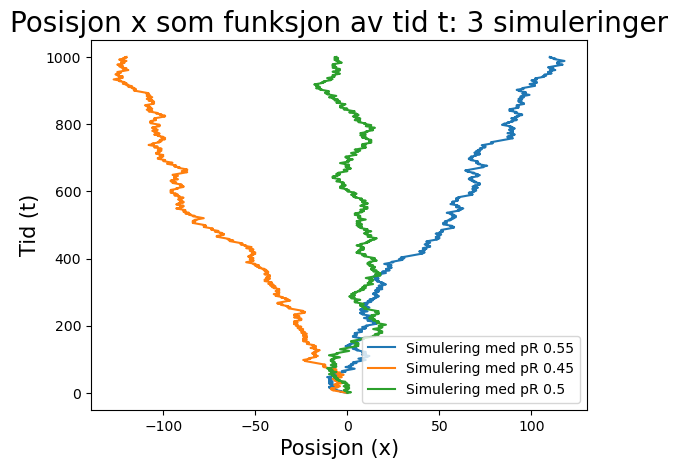

In [3]:
def plottVirrevandrer(M, pR):  
    '''
    Funksjonen tar inn antall steg M og de ulike sannsynlighetene for å gå til høyre pR.
    Den returnerer et plott av virrevandrerne som lages ved hjelp av funksjonen i 1b).
    '''                  
    plt.figure()
    plt.xlabel('Posisjon (x)', fontsize=15)
    plt.ylabel('Tid (t)', fontsize=15)
    plt.title(f'Posisjon x som funksjon av tid t: {len(pR)} simuleringer', fontsize=20)
    
    for i in range(len(pR)):                                           # len(pR) gir oss antall vandrere som skal plottes, og det itereres over disse
        posisjon, tid = virrevandrer(M,pR[i-1])                        # Henter ut posisjonen og tidsarrayen til vandreren med valgt pR 
        plt.plot(posisjon, tid, label=f'Simulering med pR {pR[i-1]}')  # Plotter vandreren
        # Henter ut 
    plt.legend()
    plt.show()         # Viser plottet til slutt, slik at alle vandrere havner i samme figur

pR = [0.45,0.50,0.55]  # Liste med ønskede verdier for pR
M = 1000               # Ønsket varighet/antall steg
plottVirrevandrer(M,pR)

For å kunne plotte vandring for flere verdier av pR, valgte vi å skrive en plottefunksjon. Denne brukte vi blant annet for å se på virrevandrere med ulik tid M for å bedre forstå effekten av pR, selv om dette ikke var den verdien av M vi ønsket å plotte i oppgaven.

Ved lave verdier for M vil ikke de ulike verdiene av pR gi store utslag på posisjonen til vandreren. Selv om vi har valgt å bruke np.random.uniform, vil ikke uniformheten inntre før ved større verdier av M. 

Ved høyere verdier for M vil det i snitt være pR av stegene som går mot høyre. Dette er illustrert av figuren over. Den viste simuleringen viser det vi forventer basert på innsatt pR, og er derfor representativ for pR.

Det er derfor viktig at man velger stor nok M for at grafene skal kunne være representative for pR-verdien. Derfor har vi vagt M=1000 framfor f.eks den lavere verdien M=20 som ikke ville vært representativ for pR. Med en enda høyere M ville man selvsagt sett en enda større spredning, men vi så ikke nødvendigheten av dette da plottet vårt allerede viser en klar tendens. Det er verdt å merke at vi først forsøkte å benytte M = 500, men oppdaget at til og med da var det hendelser av at vandreren med pR = 0.5 kom mer til høyre enn vandreren med pR = 0.55.

Valget av å plotte posisjonen langs x-aksen er for å bedre vise hva som er venstre og høyre.

### Oppgave 1 d)

Å kunne definere en funksjon som kan gjøre operasjonen for flere vandrere på en gang er viktig for å holde koden kort og lett å benytte. I tillegg er det viktig for bruk videre med tumorer, fordi det ville vært upraktisk å skulle plotte en og en vandrer et sted der man kanskje behøver veldig mange av dem.

In [4]:
def flereVandrere(N, M, pR):  
    '''
    Funksjonen tar inn ønsket antall N virrevandrere, M tidssteg og sannsynlighet for å gå til høyre pR.
    Den returnerer en matrise hvor en kolonne representerer er tidspunkt og hver rad er en vandrer.
    '''          
    alleVandrere = np.zeros((N,M+1))                # Lager en matrise med nuller med N rader(vandrere) og M+1 kolonner(tidspunkt). +1 er for å få med posisjonen i tid 0 før vandringen starter.

    for i in range(N):                              # Kjører for løkka for N virrevandrere
        virrePosisjon, tid = virrevandrer(M, pR)    # Henter ut posisjonen ved hver tid for hver vandrer
        alleVandrere[i] = virrePosisjon             # Lagrer posisjonen til vandrer nr. i i den i-ende raden i matrisa
    return alleVandrere                  

Som nevnt i oppgaveteksten har vi prioritert å ha en lett forståelig kode. På grunn av dette er den ikke helt optimal, ettersom den i en for-løkke kaller på en funksjon som tidligere har brukt for-løkke og if-else statement. Skal koden brukes videre er det lurt å gjøre den kortere og raskere. Det er dette vi gjør i oppgave e).

### Oppgave 1 e) - Tid før optimalisering

Når man videre i oppgaven men og i større grad i videre kurs og arbeidslivet skal skrive tunge program som involverer mange operasjoner, er det essensielt å benytte seg av tidseffektiv kode. Akkurat i denne oppgaven er ikke kjøretiden det aller viktigste, ettersom det ikke føles ut som en stor forskjell dersom koden bruker 1 eller 5 sekunder på å kjøre. Det er når man kommer til tilfeller der koden bruker 5 eller 25 minutter på å kjøre at man kanskje virkelig innser viktigheten av å skrive godt og effektivt.

In [5]:
tidfor = time.time()
flereVandrere(1000,1000, 0.5)
tidetter = time.time()
tidsendring = tidetter-tidfor # regner ut tiden det tar for å kjøre funksjonen i 1d)
print(f'Tid før optimalisering: {tidsendring}')

Tid før optimalisering: 1.5203781127929688


Vi forsto ikke hvordan %timeit fungerte, så vi benyttet heller time.time() som vi var kjent med fra tidligere kurs. Brukte denne til å regne ut differansen mellom tiden før og etter funksjonen kjørte.

### Oppgave 1 e) - Tid etter optimalisering

In [6]:
"--------------------------------------------------------------------------------"

def flereVandrereOpt(N, M, pR):  
    '''
    Funksjonen tar inn ønsket antall N virrevandrere, M tidssteg og sannsynlighet for å gå til høyre pR.
    Den returnerer en matrise hvor en kolonne representerer er tidspunkt og hver rad er en vandrer.
    ''' 
    alleVandrere = np.zeros([M+1,N])                                        # Definerer en matrise av nuller transponert i forhold til den i forrige funksjon. Dette er slik at vi kan iterere gjennom tidsstegene
    for t in range(1,M+1):                                                  # Itererer gjennom tidsstegene
        alleVandrere[t] = alleVandrere[t-1] + np.random.choice([-1,1],N,pR) # Setter posisjonen til alle vandrere i tidspunkt t lik posisjon i t-1 +  -1 eller +1
    return alleVandrere.T                                                   # Returnerer den transponerte matrisa, slik at den er på samme form som i forrige funksjon

"--------------------------------------------------------------------------------"

tidforopt = time.time()
flereVandrereOpt(5,10, 0.5)
tidetteropt = time.time()
tidsendringopt = tidetteropt-tidforopt   # Regner ut tiden det tar for å kjøre den optimaliserte koden
print(f'Tid etter optimalisering: {tidsendringopt}')
print(f'Den optimaliserte koden går {tidsendring/tidsendringopt} ganger raskere enn den første')


Tid etter optimalisering: 0.0051403045654296875
Den optimaliserte koden går 295.77588126159554 ganger raskere enn den første


Python fungerer slik at en linje kode leses og kjøres før programmet går videre til neste linje med kode. Prosessen med å lese den skrevne koden og oversette det til programspråk er derfor svært tidkrevende i Python. I et annet språk som for eksempel C++ kompileres koden før den kjøres, noe som reduserer kjøretiden i lengden (3). Ved å kutte ned på linjer som må leses vil koden kjøre raskere. Det er ikke nødvendigvis antallet linjer med skrevet kode som bør kuttes ned, men spesielt nøstede løkker og if-else statements. Ved å begrense bruken av dette vil koden kjøre betraktig raskere. 

Bruk av innebygde funksjoner og bibloteker i python vil også kunne gjøre programmet raskere. Et godt eksempel på dette er bruk av numpy arrayer fremfor vanlige python lister. Et annet godt bibliotek som kan brukes for å kutte kjøretid er Numba. Som oppgitt i oppgaveteksten kan det kreve en del å sette seg inn i dette, noe som er grunnen til at vi har valgt å holde med NumPy gjennom dette prosjektet. Vi har absolutt sett verdien av å ha kode som kjører raskere, ettersom noen av utregningene tar langt tid med mange virrevandrere og høye tidssteg, men har valgt å ikke bytte over for å forstå mest mulig og være mest mulig komfortable med vår egen kode. Til et senere prosjekt som kan bli enda tregere, vil vi absolutt se på å benytte Numba.

I denne oppgaven har vi optimalisert koden ved å forkorte den, kuttet ned bruken av for-løkker og fjernet if- else statements. Den optimaliserte koden går nå betraktelig raskere enn den første, noe som har hjulpet oss godt i senere oppgaver.


Vi vil bemerke at kjøring av denne blokken noen ganger fører til en error. Det er rett og slett fordi koden kjører så fort at Jupyter Notebook runder av kjøretiden til null sekunder, og dermed ender man opp med å dele på null i siste print.

### Oppgave 1 f)

Varians kan være et godt mål for å se på hvor stor spredning noe har.  Virrevandrere er definert som den tilfeldige bevegelsen av partikler, så det å se på variansen til denne bevegelsen kan være nyttig for å finne sannsynligheten for de fremtidige posisjonene, som vi kan se fra ligning (2) i 1 a). Dette kan igjen være nyttig for å undersøke diffusjonen, da den er avhengig av posisjonsendringen til virrevandrerne. Dette viste vi i 1 a). 

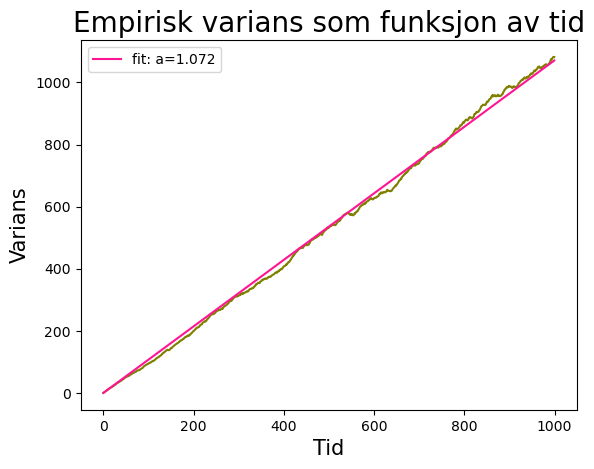

In [7]:
"Bruker oppgitte verdier for M, N og pR"
M = 1000 
N = 1000
pR = 0.5

"--------------------------------------------------------------------------------"

vandrerVarians = flereVandrereOpt(N, M, pR).T        # Transponerer funksjonen fra 1 e) slik at vi kan iterere gjennom tidsstegene
varians = np.zeros(M)                                # Lager en tom matrise med M elementer for å fylle inn variansen som funksjon av tid
for i in range(M):
    varians[i]=statistics.variance(vandrerVarians[i])# Regner ut variansen i posisjonen til alle virrevandrerne for hver tid

"--------------------------------------------------------------------------------"  

def rettLinje(t, a):
    '''
    Funksjonen lager en rett linje som vi kan bruke for å finne den beste tilnærmingen for variansverdiene.
    a er konstanten vi vil finne som tilpasser linja vår best
    ''' 
    return a*t

"--------------------------------------------------------------------------------"

tid = np.arange(0,M,1)                             # Lager et array med tider for å kunne plotte variansen som funksjon av tid
variance, cov = curve_fit(rettLinje, tid, varians) # cov = kovarians som viser hvor bra grafen er tilpasset, men denne bruker vi ikke

"--------------------------------------------------------------------------------"
'''
Plotter variansen sammen med en rett linje som er tilpasset verdiene for å se hvor mye støy det er i variansen
'''
plt.figure()
plt.xlabel('Tid', fontsize=15)
plt.ylabel('Varians', fontsize=15)
plt.title(f'Empirisk varians som funksjon av tid', fontsize=20)
plt.plot(tid, varians, c = 'olive')                                                              # Plotter variansen fra vandrerne regnet ut øverst
plt.plot(tid, rettLinje(tid, *variance), c = 'deeppink', label='fit: a=%5.3f' % tuple(variance)) # Plotter den best tilnærmede rette linja til variansverdiene og viser hva verdien a er for denne linja
plt.legend()
plt.show()


I oppgave 1 a) får vi oppgitt at variansen er gitt ved $\sigma = at,$ og den rette linja vi ønsker å tilpasse variansen til er definert ved dette uttrykket. a er i dette tilfellet en konstant som fungerer som stigningstallet til grafen, og ut fra simuleringene skal den best mulig skal tilpasse den rette linja. Når vi plotter curvefit og utregnet varians sammen, ser vi at vi får en tilpasset linje som ligner utregningene, og en a som ligger rundt 1, som er det vi kom frem til i oppgave 1 a).

Grunnen til at den ikke blir akkurat lik 1 i denne oppgaven, kan være fordi plottet vårt viser et mer realistisk bilde på hvordan variansen mellom virrevandrerne ser ut. Her ser vi kun på et bestemt antall virrevandrere som beveger seg over et bestemt antall tidssteg. I den analytiske delen i oppgave 1 a), ser vi på virrevandring med infinitesimale steg, som gir oss en mer nøyaktig verdi. Om vi skulle gjort det samme her ville programmet brukt altfor lang tid å kjøre, og kanskje til og med kræsje, siden en datamaskin ikke vil klare å kjøre gjennom infinitesimale verdier. 

Om vi holder N til en fast og noe lav verdi og øker M får vi flere steg for hver vandrer. Da vil vi få enda flere steg der virrevandrerne enten kan bevege seg til høyre eller venstre. Derfor vil vi få et plott der vi i noen punkter ser en stor varians, fordi det i dette tilfelle vil være mange virrevandrere som f.eks beveger seg mot venstre. 

Om vi øker N men holder M fast, vil vi ha mange virrevandrere som enten kan bevege seg til høyre eller venstre. Med et stor nok N vil det være tilnærmet like mange virrevandrere som beveger seg til høyre som til venstre, slik at grafen vil minne mer og mer om en rett linje. Så for at den empiriske variansen i større grad skal samsvare med det analytiske resultatet i 1 a), burde man gjenta simuleringen med høyere N.

### Oppgave 1 g)

For å gjøre simuleringen mer anvendbar, er det nødvendig å utvide vannmolekylenes vandring til to dimensjoner. Dette vil da kunne representere for eksempel et flatt utsnitt fra kroppen som skal undersøkes. Skal man gjøre det enda bedre burde man utvide det til også tre dimensjoner, men en slik simulering skal vi ikke se på nå.

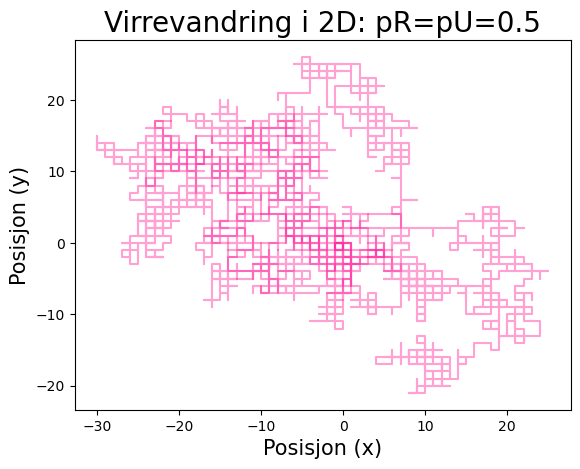

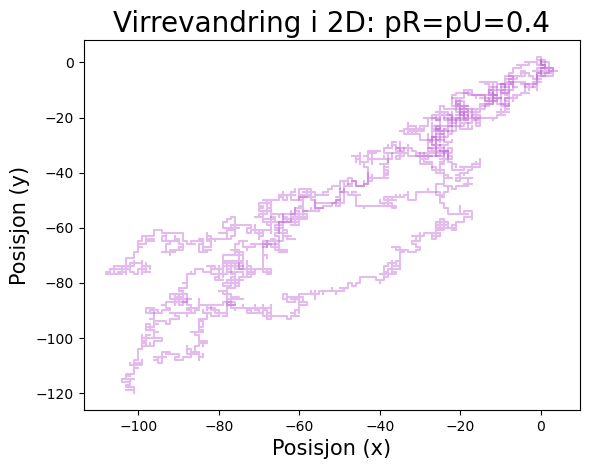

In [8]:
def toDVandrere(N, M, pR, pU): 
    '''
    Funksjonen tar inn N vandrere, M tidssteg, sannsynlighet for å gå til høyre pR og sannsynlighet for å gå opp pU.
    Den gjør det samme som funksjonen i 1b), men i to dimensjoner.
    Returnerer et array med x-posisjoner, et array med y-posisjoner og tiden.
    '''                        
    dt = 1
    dx = 1
    tid = np.arange(0,M+1,dt)                              # Lager et array med tider, fra 0 til og med M
    oppEllerBort = np.random.randint(0,2,M)                # Lager et array med tilfeldige antall 0 og 1. 0 tilsier horisontal forflytning, 1 tilsier vertikal
    posx = np.zeros((N,M+1))                               # Lager en matrise med x-posisjoner med N rader(vandrere) og M+1 kolonner(tidspunkt) 
    posy = np.zeros((N,M+1))                               # Lager en matrise med y-posisjoner med N rader(vandrere) og M+1 kolonner(tidspunkt)
    
    for s in range(N):
        tilfeldigeTall = np.random.uniform(0,1,M)
        
        for t in range(1,M+1):
            if oppEllerBort[t-1] == 0:                     # Hvis vi får 0, beveger vi oss horisontalt
                if tilfeldigeTall[t-1]<pR:                 # Hvis tilfeldig sannsynlighet er mindre enn sannsynligheten for å bevege seg til høyre, går den til høyre   
                    posx[s][t] = posx[s][t-1]+dx
                    posy[s][t] = posy[s][t-1]
                else:                                      # Hvis tilfeldig sannsynlighet er større enn sannsynligheten for å bevege seg til høyre, går den til venstre
                    posx[s][t] = posx[s][t-1]-dx
                    posy[s][t] = posy[s][t-1]
            else:                                          # Hvis vi ikke får 0, beveger vi oss vertikalt
                if tilfeldigeTall[t-1]<pU:                 # Hvis tilfeldig sannsynlighet er mindre enn sannsynligheten for å bevege seg opp, går den opp
                    posy[s][t] = posy[s][t-1]+dx
                    posx[s][t] = posx[s][t-1]
                else:                                      # Hvis tilfeldig sannsynlighet er større enn sannsynligheten for å bevege seg opp, går den ned
                    posy[s][t] = posy[s][t-1]-dx
                    posx[s][t] = posx[s][t-1]
    
    return posx, posy, tid

"--------------------------------------------------------------------------------"
'''
Definerer oppgitte verdier for N og M.
'''
N = 4
M = 1000

"--------------------------------------------------------------------------------"
'''
Plotter vandrerne i et isotropt system
'''
plt.figure()
plt.xlabel('Posisjon (x)', fontsize=15)
plt.ylabel('Posisjon (y)', fontsize=15)
plt.title(f'Virrevandring i 2D: pR=pU=0.5', fontsize=20)
posx, posy, tid = toDVandrere(N,M,0.5,0.5)

for n in range(N):
    plt.plot(posx[n],posy[n], c='deeppink',alpha=0.4)
plt.show()

"--------------------------------------------------------------------------------"
'''
Plotter vandrerne i et anisotropt system
'''
plt.figure()
plt.xlabel('Posisjon (x)', fontsize=15)
plt.ylabel('Posisjon (y)', fontsize=15)
plt.title(f'Virrevandring i 2D: pR=pU=0.4', fontsize=20)
posx, posy, tid = toDVandrere(N,M,0.4,0.4)

for n in range(N):
    plt.plot(posx[n],posy[n], c='mediumorchid', alpha=0.4)

plt.show()

Ettersom vi ikke har valgt å låse akser på plottene, vil disse flytte seg etter hvert som virrevandrerne flytter seg lenger i en retning. I en ideell kjøring av virrevandrere med pR=pU=0.5, ville 0 vært sentrert på begge aksene, fordi vandrerne ville beveget seg likt rundt origo. Dette stemmer ikke nødvendigvis helt med vår simulering med pR=pU=0.5, men origo ligger somregel i nærheten av midten av plottet i hver kjøring.

Vi observerer at i figuren med pR=pU=0.4, beveger vandrerne seg lenger ned og til venstre. Denne anisotropien ser vi ved at origo ligger i øverste høyre hjørne. Dette viser at sannsynlighetsforskjellen har en ganske stor påvirkning, ettersom vi allerede ser virkningene så mye ved pR=pU=0.4.

### Oppgave 1 h)

n(t) er definert som andelen av virrevandrerne som har returnert til origo minst en gang i løpet av tiden t. Å se på utviklingen av n(t) gir en innsikt i hvor viktig det kan være med grensebetingelser, ettersom vandrerne etter hvert vil forsvinne ut av det observerte området. Dermed vil det uten grensebetingelser kreves flere vandrere for å i neste oppgave kunne studere tumorer som ligger lenger unna origo godt.

In [9]:
def krysserNull(vandrere, dim):
    '''
    Funksjonen tar inn en 1D eller 2D virrevandrere og sjekker om og eventuelt når vandrerene har vært i origo
    Funksjonen returnerer et array med antall vandrere som har vært i origo ved hvilke tidspunkt.
    '''
    if dim == 1:                                      # Sjekker dimensjonen til virrevandreren, fordi koden fungerer ulikt i 1D og 2D
        antallVandrere = (len(vandrere))              # Finner ut hvor mange vandrere som er tatt inn
        tidssteg = (len(vandrere[0]))                 # Sjekker hvor lenge vandrerne flytter seg
        antall = np.zeros(len(vandrere[1]))           # Oppretter et tomt array for å lagre antall vandrere som har vært i origo, like lang som antall tidssteg
        
        for i in range(0,antallVandrere):             # Itererer over antall vandrere
            sjekkVandrer = np.zeros(len(vandrere[1])) # Oppretter et tom midlertidig array med lengde lik antall-arrayet
            for t in range(1,tidssteg):               # Itererer over tidsstegene per vandrer
                if vandrere[i][t] == 0:               # Hvis posisjonen til vandreren ved denne tiden er lik null så legger vi til 1 fra denne indeksen i antalls-arrayet og ut
                    sjekkVandrer[t:] = 1
                    break
            antall = np.add(antall, sjekkVandrer)
        andel = antall/antallVandrere                 # Deler andelsarrayet på antall vandrere for å kunne returnere andelen som har vært i origo
        return andel
        
    elif dim == 2:                                    # Sjekker dimensjonen til virrevandreren, fordi koden fungerer ulikt i 1D og 2D
        antall = np.zeros(len(vandrere[2]))           # Oppretter et tomt array for å lagre antall vandrere som har vært i origo, like lang som antall tidssteg
        xPos = vandrere[0]                            # Tar inn alle x-posisjonene til vandrerne
        yPos = vandrere[1]                            # Tar inn alle y-posisjonene til vandrerne
        antallVandrere = len(xPos)                    # Finner ut hvor mange vandrere som er tatt inn
        tidssteg = len(xPos[0])                       # Sjekker hvor lenge vandrerne flytter seg

        
        for i in range(0, antallVandrere):            # Itererer over antall vandrere
            sjekkVandrer = np.zeros(len(vandrere[2])) # Oppretter et tom midlertidig array med lengde lik antall-arrayet
            for t in range(2, tidssteg):              # Itererer over tidsstegene per vandrer
                if xPos[i][t] == 0:                   # Hvis x - posisjonen
                    if yPos[i][t] == 0:               # og y - posisjonen til vandreren ved denne tiden er lik null så legger vi til 1 fra denne indeksen i antalls-arrayet og ut
                        sjekkVandrer[t:] = 1
                        break
            antall = np.add(antall, sjekkVandrer)
        andel = antall/antallVandrere                 # Deler andelsarrayet på antall vandrere for å kunne returnere andelen som har vært i origo
        return andel


Fra vår definisjon vil alle virrevandrerne starte i (x=0, t=0) og ta et steg i hvilken som helst av akse retningene hvert sekund. P(x=0, t=1) vil dermed være lik null i både 1D og 2D da alle virrevandrerne bare har beveget seg et steg vekk fra origo, og ikke kan ha beveget seg tilbake enda.

Ved (x=0, t=2) kan derimot virrevandrerne bevege seg tilbake igjen mot origo. I et isotropt system  i 1D er det sannsynligheten for hver retning pR=pL=0.5.

=> P(x=0, t=2) = 0.5 * 0.5 = 0.25.

I et isotropt system i 2D er det fire mulige retninger og sannsynligheten for hver er pU=pD=pL=pR=0.25.

=> P(x=0, t=2) = 0.25 * 0.25 = 0.0625

### Oppgave 1 i)

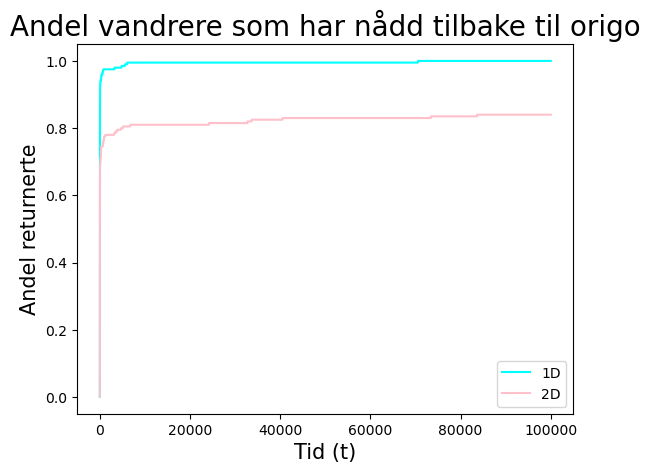

In [10]:
enDim = krysserNull(flereVandrereOpt(200,100000,0.5),1)
toDim = krysserNull(toDVandrere(200,100000,0.5,0.5),2)
tid = np.arange(0,len(enDim))

"Plotter for vandrere i både 1D og 2D"
plt.figure()
plt.xlabel('Tid (t)', fontsize=15)
plt.ylabel('Andel returnerte', fontsize=15)
plt.title(f'Andel vandrere som har nådd tilbake til origo', fontsize=20)
plt.plot(tid, enDim,c = "cyan", label = "1D")
plt.plot(tid, toDim,c = "pink", label = "2D")
plt.legend()

plt.show()

Med N = 200 og M = 1000, ser vi at nærmest alle virrevandrerne i 1D har vendt tilbake til origo minst en gang ved t = 1000. For virrevandrerne i 2D varierer det derimot mer mellom hver kjøring, men ofte ender den opp på at rundt 50% av alle vandrerne har returnert til origo minst en gang ved t = 1000. 

Vi har valgt å bruke N = 200 og M = 100 000 for å illustrere at alle virrevandrerne også i 2D vil komme til å returnere til origo minst en gang. Vi har valgt å brukte N = 200 for å se "hakkene" i 2D grafen. Dette gjør det enklere å se at det fortsatt skjer en stigning, selv om den avtar kraftig med tiden. Gjennom flere tester har vi forsøkt å få 2D plottet til å nærme seg 1, men med M = 500 000 brukte koden i overkant av 3 minutter på å kjøre, og endte likevel bare på 0.9. Vi har derfor valgt å bruke N = 100 000 fordi vi da fortsatt kan se at stigningen eksisterer, selv om den ser ut til å flate ut en del rundt 0.7/0.8. Vi synes dette valget førte til en fin mellomting mellom bevis av sannsynligheten og kjøretiden. Vi er sikre på at dersom vi hadde valgt en stor nok M ville vi endt opp med å få 2D grafen til å nå 1, men det virker som dette kunne tatt titalls minutte å oppnå.

Vi kunne også valgt å benytte en veldig lav N, men man vil da ha kunnet fått et tilfelle hvor alle vandrerne traff origo ekstremt kjapt, eller risikert at det tok veldig langt tid og at man dermed ikke ville sett utviklingen ordentlig.
 
Dersom det eneste ønsket hadde vært å nå 1 med 2D grafen, kunne vi lagt en veldig høy M og satt N rundt 50, men vi synes ikke grafen som da kom virket representativ for utviklingen og har derfor valgt å holde oss til N = 200 og M = 100 000.


# Oppgave 2:

## Diffusjon av vannmolekyler i hjernen

### Oppgave 2 a)


In [11]:
"--------------------------------------------------------------------------------"

"Definerer verdiene som er oppgitt for oppgave 2"
dxfrisk = 0.004 #mm
dtfrisk = 0.01 #sekunder

"--------------------------------------------------------------------------------"

"Regner ut diffusjonskonstanten med verdier for friskt vev"
def D(dx,dt):
    return (dx)**2/(2*dt)

"--------------------------------------------------------------------------------"

print(f'Diffusjonskonstanten i friskt vev er: {D(0.004,0.01):.4f} mm^2*s^-1')

Diffusjonskonstanten i friskt vev er: 0.0008 mm^2*s^-1


### Oppgave 2 b)

Å ha en funksjon som returnerer den effektive verdien til dx i punkt er et viktig verktøy som brukes i alle deloppgavene i oppgave 2. Ikke bare kan den påvirke steglengden til virrevandrerne dersom de treffer en tumor (eller flere), men ved å bruke den samme funksjonen kan man se hvor dx ikke er lik den friske verdien, og dermed plotte hvor tumorene befinner seg. Fordi dette er en funksjon som skal brukes mye, ønsker vi å legge mer vekt på rask kjøretid enn enkel visuell forståelse av koden.

In [12]:
def tumor(x, y, tumAreal, tumAntall, tumKoordXY, t_k):
    '''
    Funksjonen tar inn ett x- og y-koordinat, tumorenes areal og 
    sentrumskoordinater, antall tumorer og reduksjonskoeffisienten. 
    Funksjonen returnerer den aktive dx i (x,y)
    '''

    tumRadius = np.sqrt(tumAreal/np.pi)                                         # Regner ut radiusen til tumorene
    dx = dxfrisk                                                                # Oppretter en dx som kan endres, med startverdi som den friske 
    
    for i in range(tumAntall):                                                  # Kjører løkke for hvert antall tumorer
        avstand = np.sqrt((tumKoordXY[i][0] - x)**2 + (tumKoordXY[i][1]- y)**2) # Sjekker avstanden fra det innsatte punktet (x,y) til tumorens sentrum
        dx = np.where(avstand<tumRadius, dx*np.sqrt(t_k[i]),dx)                    # Dersom avstanden er mindre enn tumorens radius, reduseres dx med roten av reduksjonskoeffisienten til den tumoren
    return dx

I denne oppgaven har vi antatt at alle tumorene er sirkulære og har samme areal. Dette reflekterer lagt ifra virkeligheten, men er en enkel måte for å lage tumorer som fungerer til vår bruk. Vi har også endt med en kode som er effektiv, men likevel ganske forståelig dersom man vet hva de ulike argumentene i np.where() utfører.

På grunn av oppgaveteksten skrev vi først funksjonen slik at den tok inn alle x- og y- koordinater, og returnerte den effektive verdien for dx i disse punktene. Vi fant derimot ut at det var mer hensiktsmessig å endre den til å ta inn en posisjon (x,y) og returnere dx i denne posisjonen på grunn av senere oppgaver.

### Oppgave 2 c)

Ved å plotte bevegelsen til virrevandrerne sammen med posisjonen til tumorene, kan man se hvordan tumorene påvirker denne bevegelsen. Dette er igjen nyttig for å undersøke områder der diffusjonen er lav, som kan fortelle oss mye om hvor alvorlig kreftsvulsten er. Vi har tolket det sånn at ikke alle tumorene nødvendigvis er farlige, siden de kun reduserer posisjonsendringen, dx, med en liten verdi for t_k. De med lav t_k kan vurderes som godartede kreftsvulster. I de områdene der tumorene overlapper hverandre derimot, vil dx reduseres enda mer, og da kan vi vurdere kreftsvulstene som ondartede. Dette skal vi se mer på i 2 f). 

In [13]:
def tumorVandrer(N, M, pR, pU, tumAreal, tumAntall, tumKoordXY, t_k): 
    '''
    Funksjonen tar inn N virrevandrere, M tidssteg, sannsynlighet for å gå til høyre, 
    sannsynlighet for å gå til venstre, arealet av tumorene, antall tumorer, koordinatene 
    til tumorsentrumene og en liste med verdier for t_k
    Funksjonen returnerer 2 array, ett med x-posisjoner og ett med y-posisjoner.
    '''
    dt = 1
    tid = np.arange(0,M+1,dt)                              # Lager et array med tider, fra 0 til og med M
    oppEllerBort = np.random.randint(0,2,M)                # Lager et array med tilfeldige antall 0 og 1. 0 tilsier horisontal forflytning, 1 tilsier vertikal
    posx = np.zeros((N,M+1))                               # Lager en matrise med x-posisjoner med N rader(vandrere) og M+1 kolonner(tidspunkt) 
    posy = np.zeros((N,M+1))                               # Lager en matrise med y-posisjoner med N rader(vandrere) og M+1 kolonner(tidspunkt)
    
    for s in range(N):                                     # Itererer gjennom vandrerne
        tilfeldigeTall = np.random.uniform(0,1,M)
        startposisjonx = np.random.uniform(-L,L)           # Oppretter en tilfeldig x-startposisjon 
        startposisjony = np.random.uniform(-L,L)           # Oppretter en tilfeldig y-startposisjon
        posx[s][0] = startposisjonx                        # Setter vandrerens første x-posisjon til den tilfeldige posisjonen
        posy[s][0] = startposisjony                        # Setter vandrerens første y-posisjon til den tilfeldige posisjonen
        for t in range(1,M+1):                             # Itererer gjennom tidsstegene
            if oppEllerBort[t-1] == 0:                     # Hvisvi får null 0, beveger vi oss horisontalt

                "----------------------------------------------------------------------"
                " Dette gir oss grensebetingelsene (harde vegger) valgt i oppgave 2 d)"
                posx = np.where(posx > L, L, posx)
                posx = np.where(posx < -L, -L, posx)
                posy = np.where(posy > L, L, posy)
                posy = np.where(posy < -L, -L, posy)
                "----------------------------------------------------------------------"
                
                if tilfeldigeTall[t-1]<pR:                 # Hvis tilfeldig sannsynlighet er mindre enn sannsynligheten for å bevege seg til høyre, går den til høyre 
                    posx[s][t] = posx[s][t-1]+tumor(posx[s][t-1], posy[s][t-1],tumAreal,tumAntall,tumKoordXY,t_k) # Tumor-funksjonen returnerer dx i innsatt koordinat, og påvirker dermed steglengden
                    posy[s][t] = posy[s][t-1]
                else:                                      # Hvis tilfeldig sannsynlighet er større enn sannsynligheten for å bevege seg til høyre, går den til venstre
                    posx[s][t] = posx[s][t-1]-tumor(posx[s][t-1], posy[s][t-1],tumAreal,tumAntall,tumKoordXY,t_k)
                    posy[s][t] = posy[s][t-1]
            else:                                          # Hvis vi ikke får 0, beveger vi oss vertikalt
                if tilfeldigeTall[t-1]<pU:                 # Hvis tilfeldig sannsynlighet er mindre enn sannsynligheten for å bevege seg opp, går den opp
                    posy[s][t] = posy[s][t-1]+tumor(posx[s][t-1], posy[s][t-1],tumAreal,tumAntall,tumKoordXY,t_k)
                    posx[s][t] = posx[s][t-1]
                else:                                      # Hvis tilfeldig sannsynlighet er større enn sannsynligheten for å bevege seg opp, går den ned
                    posy[s][t] = posy[s][t-1]-tumor(posx[s][t-1], posy[s][t-1],tumAreal,tumAntall,tumKoordXY,t_k)
                    posx[s][t] = posx[s][t-1]
    "Funksjonen returnerer posisjonen til alle virrevandrere ved alle tidspunkt"
    return posx, posy


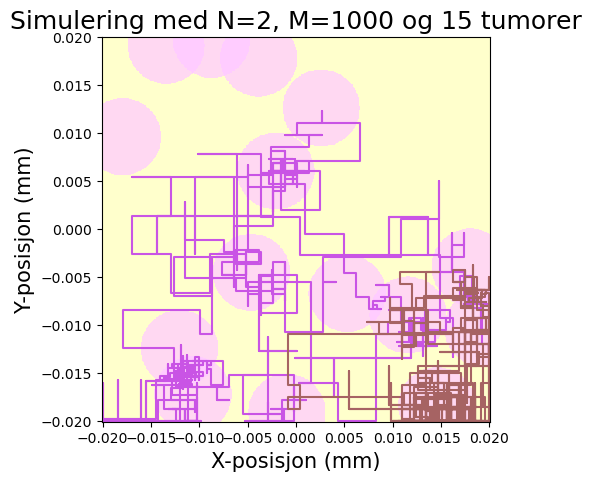

In [14]:
" Definerer de ulike verdiene som skal brukes i oppgaven"
L = 0.02                                           # Oppgitt i millimeter
antVandr = 2                                       # Antall vandrere som skal plottes
varighet = 1000                                    # Varighet av simulering
tumAntall = 15                                     # Antall tumorer
t_k = 0.1*np.ones(tumAntall)                       # Oppgitt reduksjonskoffisient for hver tumor
tumKoordXY = np.random.uniform(-L,L,(tumAntall,2)) # Genererer array med en tilfeldig x og y koordinat per virrevandrer
tumAreal = np.pi*(dxfrisk)**2                      # Arealet av tumorene

"--------------------------------------------------------------------------------"

" Oppretter et meshgrid med x og y verdier fra - 0.02mm til 0.02mm med 500 steg"
x = np.linspace(-L, L, 500)
y = np.linspace(L, -L, 500)
xv, yv = np.meshgrid(x, y)

"--------------------------------------------------------------------------------"

" Kaller på tumor- og vandrerfunksjonen for å få verdiene av tumorne og vandrerne"
tumorer = tumor(xv, yv,tumAreal,tumAntall,tumKoordXY,t_k)                                     # Variabelen returnerer de ulike verdiene for dx i meshgriden, som kan plottes for å vise tumorene
verdier = tumorVandrer(antVandr,varighet,0.5,0.5, tumAreal, tumAntall, tumKoordXY, t_k)       # Variabelen gir oss posisjonene til vandrerne i alle tidspunkt

"--------------------------------------------------------------------------------"

"Plotter tumorene med pcolormesh"
fig, ax = plt.subplots()
fig.set_figwidth(5)
fig.set_figheight(5)
plt.xlabel('X-posisjon (mm)', fontsize=15)
plt.ylabel('Y-posisjon (mm)', fontsize=15)
plt.title(f'Simulering med N=2, M=1000 og 15 tumorer', fontsize=18)
ax.pcolormesh(x, y, tumorer, alpha = 0.2, cmap = "spring")

"--------------------------------------------------------------------------------"

"Plotter vandrerne i samme figur med samme tumorposisjoner"
for i in range(antVandr):
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(verdier[0][i],verdier[1][i], c=col)
    
"--------------------------------------------------------------------------------"

plt.show()

Vi har valgt å definere virrevandrerne her slik at de begynner i en tilfeldig posisjon innenfor det gitte området, og starter vandringen sin derfra. Vi ser at når virrevandrerne beveger seg i det friske(gule) området, er stegene nokså lange. Men med en gang de kommer innenfor en tumor, som er de runde objektene, blir banen mye tettere. Dette er fordi de beveger seg mye saktere innenfor tumoren. Vi vet fra defineringen av funksjonen at hver tumor reduserer dx med en verdi $\sqrt{t_k}$, og kan dermed observere at dersom flere tumorer overlapper og "fanger" en virrevandrer, vil dx reduseres flere ganger med samme faktor, en gang per tumor. Vi kan derfor observere at dersom nok tumorer overlapper, beveger virrevandreren seg veldig kort per steg og sliter med å unnslippe.

 Ellers ser vi at virrevandrerne har like stor sannsynlighet for å bevege seg opp, ned, til høyre og til venstre. Vi ser også effekten av grensebetingelsene, som ble implementert i neste oppgaev, ved at banen til virrevandrerne ikke kommer utenfor bildet, men heller beveger seg tilbake inn etter hvert. 

### Oppgave 2 d)


Vi har valgt å gå med grensebetingelsen harde vegger. Dette valgte vi først og fremst fordi dette fremsto som den mest virkelighetsnære grensebetingelsen ved første øyekast. Vi tenkte at dersom vi observerer et gitt område, vil bare vandrerne bevege seg innenfor dette området. Denne tankegangen hang nok litt sammen med lite kunnskap om hvordan MRI egnetlig fungerer. 

I ettertid har vi likevel syntes at valget har vært lurt. For det første var implementasjonen enkel og lett oversiktlig, og krevde ikke store endringer i koden. For det andre førte grensebetingelsen til at det alltid var samme antall vandrere i det utforskede området. For å gjøre dette mer virkelighetsnært kan man blant annet se på det at vandrerne "spratt" tilbake fra veggen og inn igjen som at forrige vandrer forsvant ut i det punktet og en ny kom inn igjen på samme sted. Dette er derimot ikke noe som er veldig sannsynlig, og vi har derfor innsett at harde vegger ikke nødvendigvis behøver å gjenspeile virkelige situasjoner hvor det er langt fler enn 2 vandrere per observerte område, som er den verdien vi oftest har operert med. 

En annen grunn til at vi valgte å implementere grensebetingelser i det hele tatt komfra resultatet fra oppgavene 1 h) og i). Der så man at ettersom tiden gikk, besøkte færre og færre vandrere origo. Dette tilsier at spredningen av virrevandrerne blir veldig stor etter hvert, og ved bruk for å oppdage tumorer ved hjelp av f.eks. kun 2 vandrere ville dette vært uhensiktsmessig.

En grunn til at vi ikke valgte å benytte oss av de periodiske grensebetingelsene var diskusjoner om hva det vil si at en vandrer går ut på en side og inn den andre. Ved senere ettertanke vil nok effekten av de periodiske grensebetingelsene ha vært noenlunde de samme som de vi har fått med de harde veggene, dersom man hadde sett det at vandreren gikk ut den ene siden og inn den andre siden som at en forsvant og en ny dukket opp. Dermed ville dette kanskje vært et bedre valg, men bruken i simuleringen blir stort sett den samme. Et positivt utfall av at vi har benyttet harde vegger er at vi kan plotte virrevandrerne med streker som viser banen, hvor vi vet at andre som har benyttet periodiske betingelser har måttet plotte de som prikker istedet på grunn av vanskeligheter når vandreren forsvinner ut siden.

Grensebetingelsene er implementert direkte i tumorvandrerfunksjonen, ved hjelp av np.where.

### Oppgave 2 e)

Her ønsker vi å benytte oss av histogram for å finne intensiteten til posisjonen til virrevandrerne i hjernen. Funksjonen defineres her og skal brukes videre i de neste oppgavene. 

In [15]:
"Funksjonen tar inn posisjonene fra 2c), maksimum og minimum verdiene til x og y, og oppløsningene n_x og n_y"
def I(x_data, y_data, xmax, xmin, ymax, ymin, n_x, n_y):
    x_kanter = np.linspace(x_min, x_max, n_x+1) # +1 for å få med hele boksen
    y_kanter = np.linspace(y_min, y_max, n_y+1)
 
    intensitet, x_kanter, y_kanter = np.histogram2d(x_data.flatten(), y_data.flatten(), bins=[x_kanter, y_kanter], density = True) #bruker flatten() for å gjøre om fra 2D lister til 1D lister
    "Lager et histogram for intensiteten"

    return intensitet.T, x_kanter, y_kanter #transponeter intesiteten for at plottet ikke skal bli speilvendt
    "Returnerer den transponerete intensiteten, "

### Oppgave 2 f)


Å finne intensiteten til virrevandrerne er en fin måte for å lettere se hvor diffusjonskonstanten er lavest. Høy intensitet tilsvarer høy celletetthet av virrevandrere, som igjen tilsvarer lav diffusjon. På denne måten kan vi lettere finne områder med tumorer. Vi må passe på at oppløsningen vi har valgt passer med antall tumorer N og antall tidssteg M. Hvis vi klarer å finne passende verdier for disse, kan vi få et veldig tydelig bilde av det som skjer i hjernen. 

Vi så det hensiktsmessig å kun plotte for to vandrere over mange tidssteg, ettersom de samme verdiene har blitt benyttet i en tidligere oppgave.  

In [ ]:
"Definerer de nye verdiene for t_k, antall tumorer vi ønsker å bruke i plottet og arealet av tumorene"
antall_tumorer = np.random.randint(10, 25) #antall tumorer er tilfeldig valg mellom 10 til 25
t_k = np.random.uniform(0.3, 0.45, antall_tumorer) #reduksjonskoeffisientene er tilfeldig valgt innenfor intervallet (0.3, 0.45)
tumAreal = np.pi*(dxfrisk)**2
antVandr = 200                                       # Antall vandrere som skal plottes
varighet = 5000                                   # Varighet av simulering
L = 0.02
tumKoordXY = np.random.uniform(-L,L,(antall_tumorer,2))

"--------------------------------------------------------------------------------"

"Definerer verdiene som funksjonen i 2 e) skal ta inn"
x_max = y_max = L #fordi domenet vårt er 2L når vi går fra -L til L
x_min = y_min = -L
n_x = n_y = 40
x = np.linspace(-L, L, n_x)
y = np.linspace(L, -L, n_y)
xv, yv = np.meshgrid(x, y)

"--------------------------------------------------------------------------------"

"Definerer det vi vil plotte med de nye verdiene"
tumorer = tumor(xv, yv,tumAreal, antall_tumorer,tumKoordXY,t_k)
posisjonx_ut, posisjony_ut = tumorVandrer(antVandr, 1000, 0.5, 0.5, tumAreal, antall_tumorer, tumKoordXY, t_k) # gir oss dataen fra 2c)
intensitet_plot, x_kanter_plot, y_kanter_plot = I(posisjonx_ut, posisjony_ut, x_max, x_min, y_max, y_min, n_x, n_y)

"--------------------------------------------------------------------------------"

"Plotter funksjonen vi lagde i 2 e) med tilfeldige verdier for t_k og antall tumorer"
plt.pcolormesh(x_kanter_plot, y_kanter_plot, intensitet_plot, cmap='cool') #x-og y-kanter viser hvor mange biter vi deler plottet i
plt.colorbar()
plt.xlabel('x posisjon', fontsize=10)
plt.ylabel('y posisjon', fontsize=10)
plt.title(f'Intensitet til virrevandrernes tetthet', fontsize=10)                                                          
plt.show()

"--------------------------------------------------------------------------------"

"Plotter en figur som viser posisjonene til tumorene som i 2 c)"
plt.pcolormesh(x, y, tumorer, alpha = 0.2, cmap = "spring")
plt.xlabel('x posisjon', fontsize=10)
plt.ylabel('y posisjon', fontsize=10)
plt.title(f'Posisjon til tumorer', fontsize=10)       

"--------------------------------------------------------------------------------"

plt.show()

Her ser vi hvordan intensiteten er høyere der tumorene er, ved å sammenligne de to plottene. Det at vi kan se prikker i plottene over hele bildet, betyr bare at virrevandrere har vært i disse posisjonene. Jo tettere og sterkere farget disse prikkene er, desto mer sannsynlig er det for at vi har en tumor der. 

Intensiteten gjør at vi i stor grad kan detektere tumorenes posisjon, da det viser hvor det er tettest med virrevandrere, altså der diffusjonskonstanen er lavest. I oppgave 2 c) så vi at stor tetthet av virrevandrere betyr at de er innenfor en tumor. Det er derimot ikke like lett å se hvor store de er, da det er sannsynlig at virrevandrerne ikke har beveget seg i alle punktene i tumoren. Altså er det fullt mulig å kun se en strek i plottet i 2 c) der det er en tumor. Vi observerer at det er lettere å si noe på størrelsen når tumorene overlapper hverandre fullstendig, da det vil være enda tettere med tumorer, men igjen er det ikke sannsynlig at virrevandrerne "fyller" hele. Som nevnt i 2 c), kan vi tolke de overlappende tumorene som ondartede kreftsvulster. Vi ser i intensitetsbildet at intensiteten i et slikt område er veldig høyt. Ellers ser vi ikke urovekkende høye intensiteter der tumorene er alene.

Om virrevandrerne starter innenfor en tumor, er det større sjanse for at intensiteten blir større her, enn når de starter utenfor og kommer inni. Dette er fordi de har en begrensning på hvor lenge de skal bevege seg, som vi har bestemt med M i 2 c), så når de starter innenfor en tumor, vil de "bruke" opp mange av stegene sine her. Hvis de derimot starter utenfor en tumor, er det en sannsynlighet for at de ikke engang kommer innenfor tumorene, slik at intensiteten blir lavere. Hvis vi f.eks kommer i en situasjon der vi har mange virrevandrere som starter innenfor tumorene, vil den vise en mye høyere intensitet totalt enn et bildet der vi har få eller ingen virrevandrere som starter innenfor tumorer. 

### Oppgave 2 g)

Å benytte seg av sobelfilter er en fin måte for å kunne analysere bilder på. Den tar i bruk det som kalles kantdeteksjon, som er en metode for å finne nøyaktige plasseringer av organer inni kroppen. Her brukes den til å finne plasseringene til tumorene vi har laget i 2 b). Til sammenligning skal vi også se på bildet vi har laget i 2 e), for å se om intensiteten til virrevandrerne samstemmer med plasseringen til tumorene. Der vi har stor intensitet, skal vi se i plottet med sobelfilter at det er tydeligere kanter/kontraster, som vi vil se som lyse "klumper" som stikker ut av plottet. 

Sobelfilter er i tillegg en lett metode å benytte seg av i python, da den finnes som en innebygd funksjon. Da trenger vi kun å sette inn bildet, så vil den regne ut resten for oss. Ulempen med denne metoden er at den ikke viser hva som faktisk skjer. Derfor har vi prøvd å sette oss inn i Algoritme 2 oppgitt i oppgaveteksten, for å skjønne hvordan sobelfilteret fungerer. Grunnen til at vi ikke har valgt å bruke algoritmen, er fordi vi har merket tidligere at innebygde funksjoner korter ned på kjøretiden. 

Måten funksjonen funker på, som vi kan se i Algoritme 2, er at den finner gradienten til intensiteten, altså bildet vårt, ved å se på endringen til pikslene i x-retning og y-retning for alle verdiene i bildet (som ikke er kantene, da disse ikke vil ha piksler rundt seg). Vi bruker verdiene videre til å finne produktet mellom dem og matriser som regner ut endringene, en for x-retning og en for y-retning, som i Algoritme 2 er definert som gx og gy. Om vi hadde plottet kun i x-retning hadde vi sett den delen av bildet som endrer seg mest i x-retning tydeligere. Tilsvarende i y-retning. Det vi ønsker å plotte er den totale endringen i bildet. 

In [ ]:
sobel_filter = ndimage.sobel(intensitet_plot) # innebygd funksjon for å finne sobel filteret til bildet vi setter inn

bilde = plt.figure(figsize=(10, 10)) 

"--------------------------------------------------------------------------------"
"Plotter sobelfilteret"
graf = bilde.add_subplot(131, title = 'Sobel', aspect = 'equal') # for å få plottene på samme linje
sobel = graf.pcolormesh(x_kanter_plot[1:], y_kanter_plot[1:], sobel_filter, shading = 'gouraud', cmap = 'gray')
grense = make_axes_locatable(graf)
colorbar = grense.append_axes("right", size="5%", pad=0.05) #for å begrense colorbaren til å passe til størrelsen på plottet
plt.colorbar(sobel, cax=colorbar)

"--------------------------------------------------------------------------------"

"Plotter det originale bildet som vi lagde i 2e) for å sammenligne med sobelfilteret"
graf = bilde.add_subplot(133, title = 'Intensitet', aspect = 'equal')
originalt_bilde = graf.pcolormesh(x_kanter_plot[1:], y_kanter_plot[1:], intensitet_plot, shading = 'gouraud', cmap = 'cool')
grense = make_axes_locatable(graf)
colorbar = grense.append_axes("right", size="5%", pad=0.05)
plt.colorbar(originalt_bilde, cax=colorbar)

"--------------------------------------------------------------------------------"

plt.show()

Resultatet viser at plottet der vi har benyttet oss av sobelfilteret, samstemmer med bildet som viser intensiteten til virrevandrerne. De områdene som stikker ut av Sobel-plottet som klumper, tilsvarer høy intensitet. Jo mer de stikker ut, desto høyere intensitet over et større område, som vi kan se i Intensitet-plottet. 

Hvis oppløsningen n i bildet velges for høy, vil programmet krasje, sannsynligvis fordi oppløsning til et bilde har en maks verdi. At den krasjer når bildet har en oppløsning på f.eks 10000x10000 gir altså mening. Når n er valgt veldig lav blir oppløsningen veldig liten slik at bildet blir utydelig. Dermed blir det vanskeligere å skille tumorene fra hverandre, da kontrasten blir dårligere. Som sagt i 2 f), er det også viktig at verdiene vi har valgt for N (antall tumorer) og M (tidssteg) også passer bra med oppløsningen. F.eks. hvis vi har veldig mange virrevandrere, høy N, blir det vanskelig å skille alle "klumpene" fra hverandre. Når n er høy nok er det derimot lettere å se kontrastene i bildet, og dermed lettere å skille tumorene fra hverandre, som er viktig når dette skal implementeres i virkelige situasjoner. 

## Konklusjon

I de forskjellige oppgavene har det kommet fram at bevegelsesmønsteret til virrevandrerne endrer seg fra friskt til sykt vev. For eksempel kan man i oppgvave 2c) se at steglengden til virrevandrene blir kortere i tumorene, i 2f) kommer det frem at intensiteten av vannmolekylene svarer sammen med tumorposisjoner og i 2g) ble sobelfilter tatt i bruk for å kunne se tydelige kontraster i hjernen. Det kan dermed konkluderes med at bevegelsesmønsteret til virrevandrerne endres i sykt vev og ved hjelp av bildeanalyse av virrevandrerne er det lett å undersøke hvor vi finner tumorer. Man kan også undersøke i hvor stor grad tumorene påvirker virrevandrerne, slik at vi kan få informasjon om hvilke tumorer som er farlige eller ufarlige. 

## Kilder
(1) Aase N.H., Redalen K.R. (27. Januar 2023). "TMA4320 vår 2023 - Biofysikkprosjekt". Hentet fra https://wiki.math.ntnu.no/_media/tma4320/2023v/biofysikkprosjekt_2023.pdf

(2) Bøhle K, Bedin T, Øvstebø C (31. Mai 2021). "Passiv transport - diffusjon". Hentet fra https://ndla.no/nb/subject:1:83ce68bc-19c9-4f2b-8dba-caf401428f21/topic:1:1c0aeb24-1a5a-4464-8f27-30fd0472f635/topic:1:ecd6aff3-663e-4011-af14-653fb43645ea/resource:1:134159

(3) Karani D. (09. Januar 2020). "How does Python work?". Hentet fra https://towardsdatascience.com/how-does-python-work-6f21fd197888